In [1]:
# importando bibliotecas
import pandas as pd
import numpy as np
import sweetviz as sv

# bibliotecas de ML
import random
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# *Começando Análise*

*O objetivo de Projeto é usar o modelo de Machine Learning (Decision Tree Classifier) para previsão do churn aos usuários do banco, usando o método de classificação com Árvores de Decisão em diferentes níveis de ramificações.*

In [2]:
# carregando arquivo
df = pd.read_csv("C:/my_workspace/Github/Project_ML_BankCustomerPredictionChurn/data/bank_customer_churn_prediction.csv")

In [3]:
# separando
df_train, df_eval = train_test_split(df, test_size = 0.3)

In [4]:
# verificando
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


*Vamos aplicar o sweetviz para realizar um Análise Exploratória dos Dados mais rapidamente.*

In [6]:
comparison_report = sv.compare([df_train,'Train'], [df_eval,'Test'], target_feat='churn')

                                             |          | [  0%]   00:00 -> (? left)


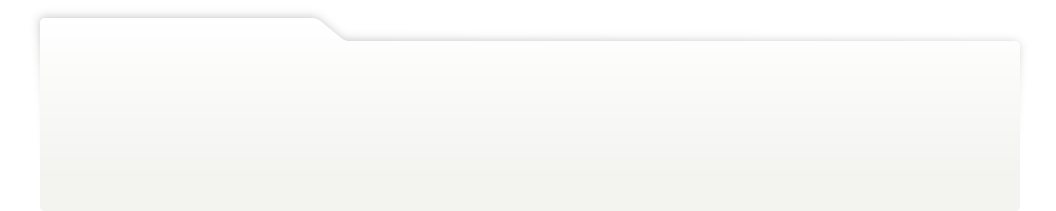
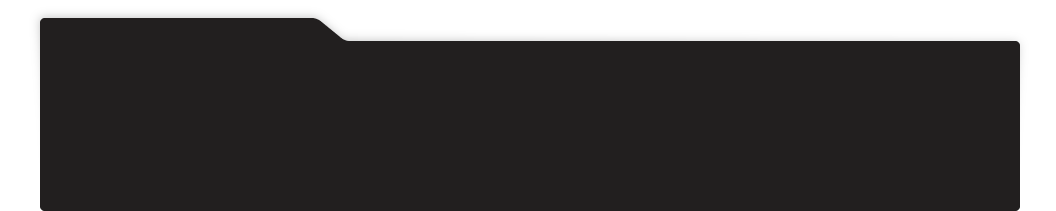
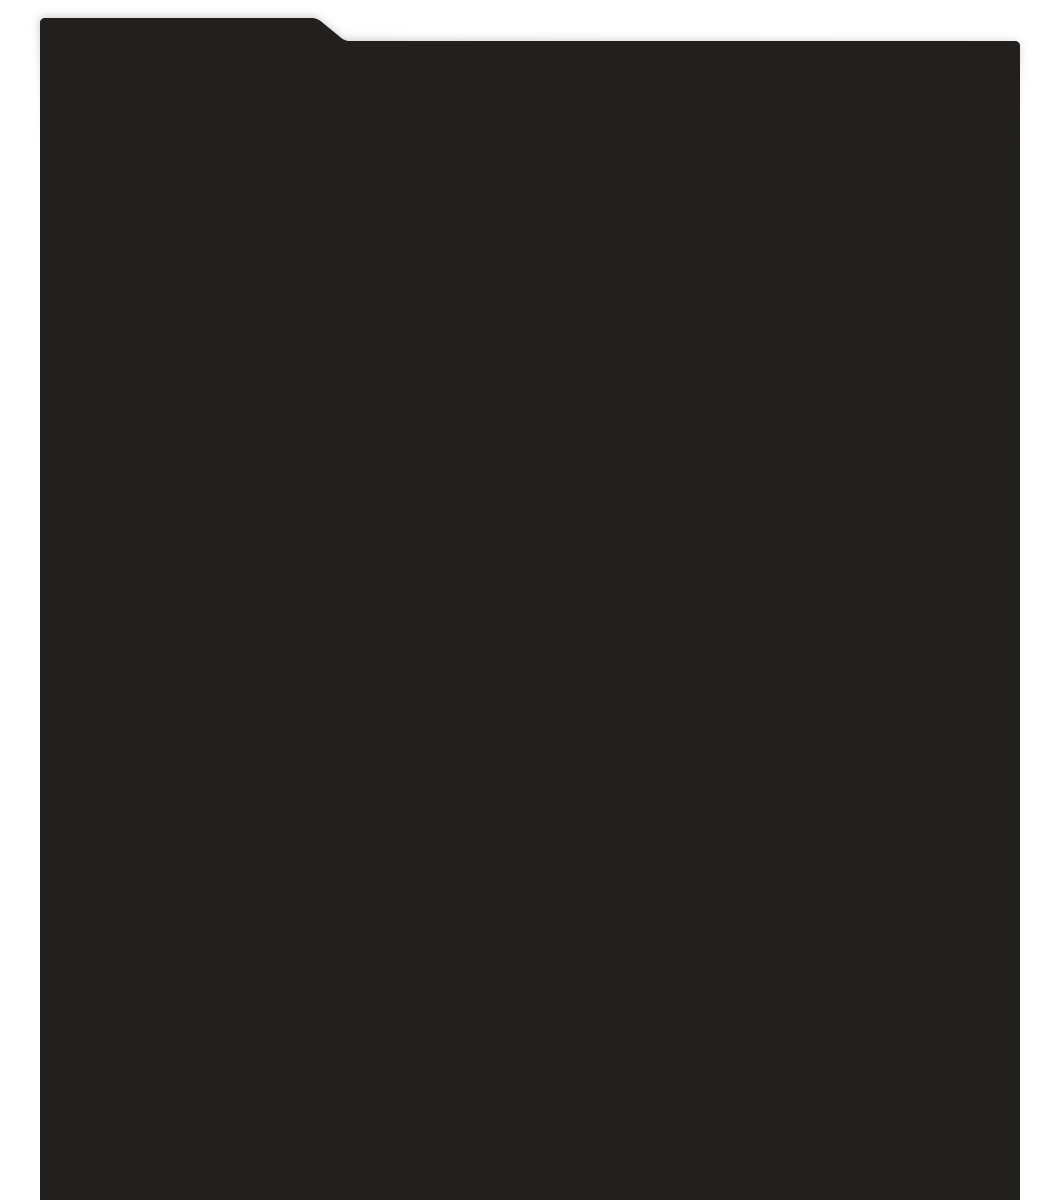
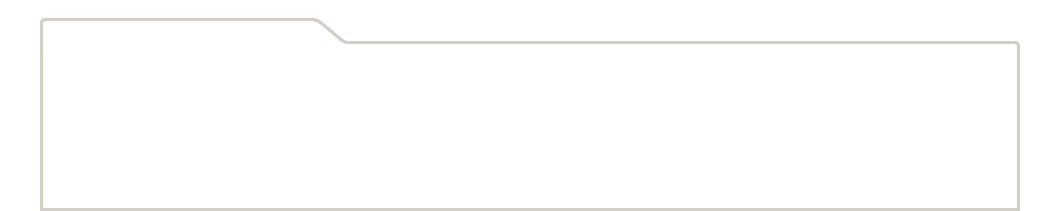
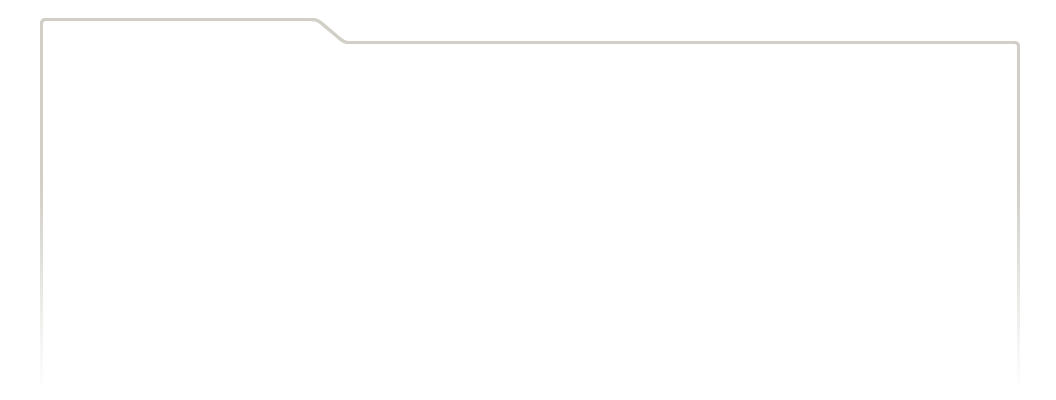
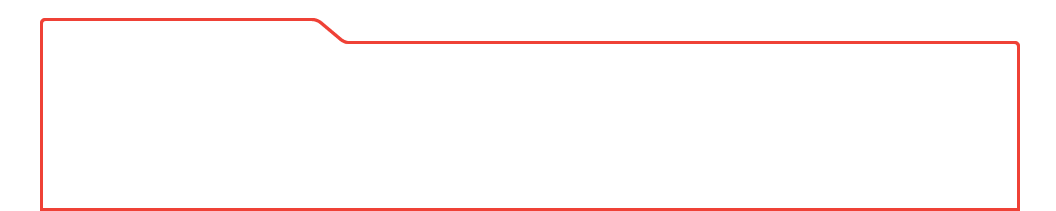
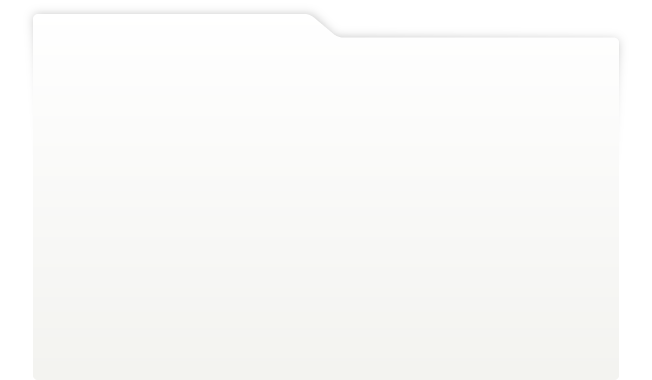
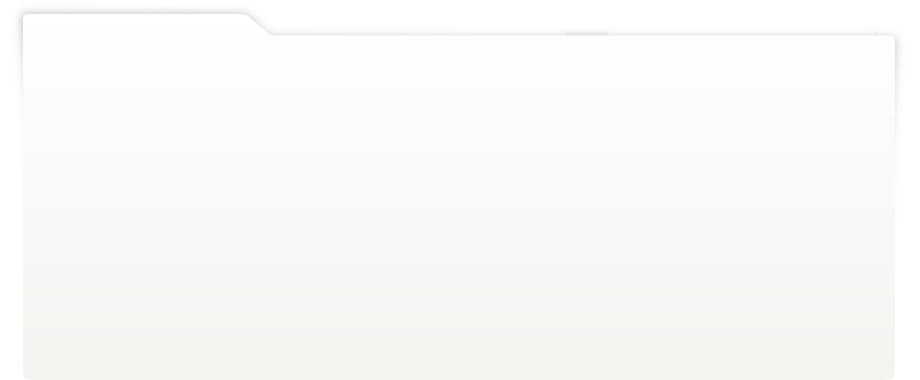
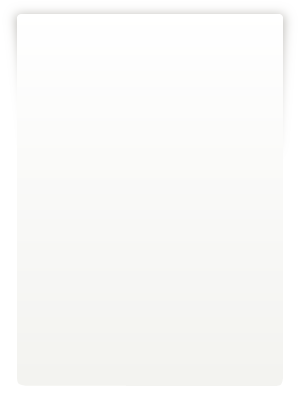
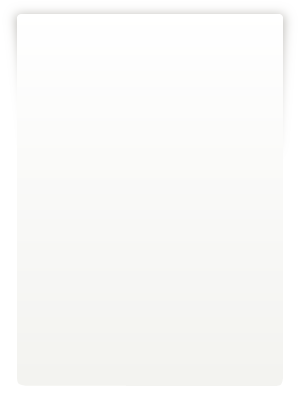
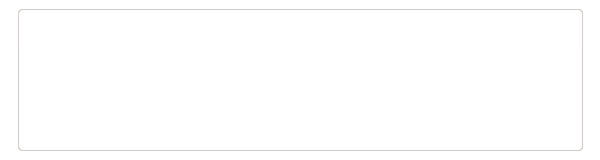
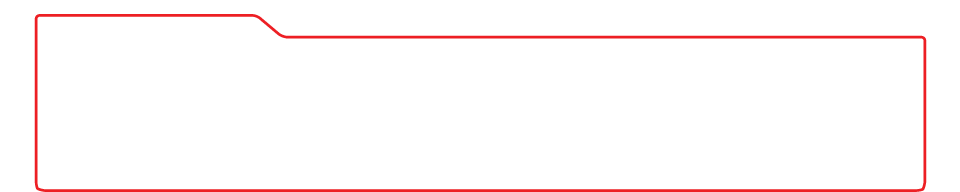
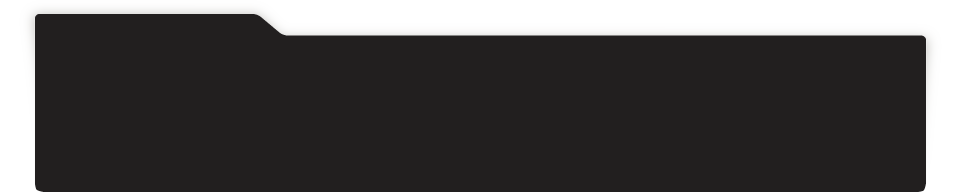
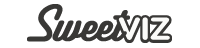
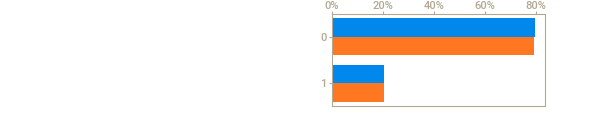
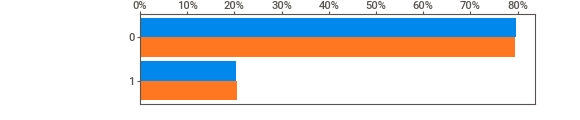
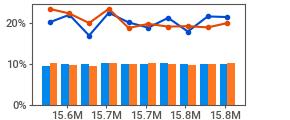
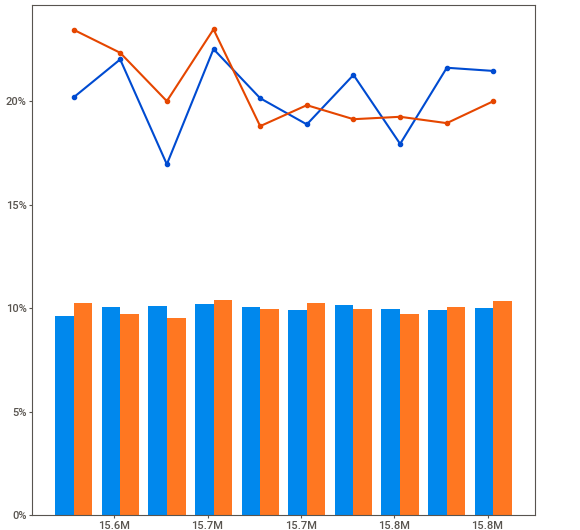
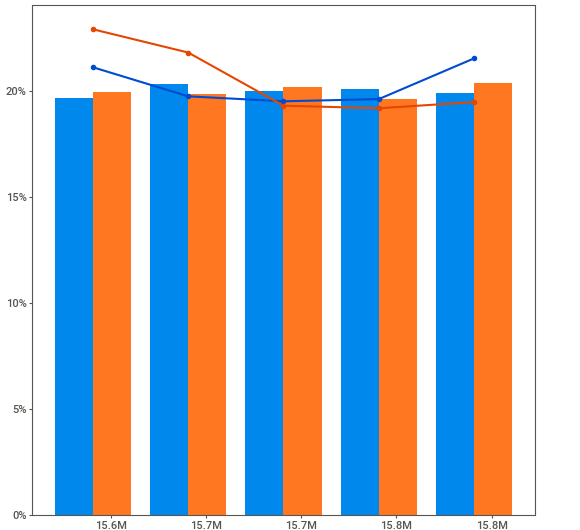
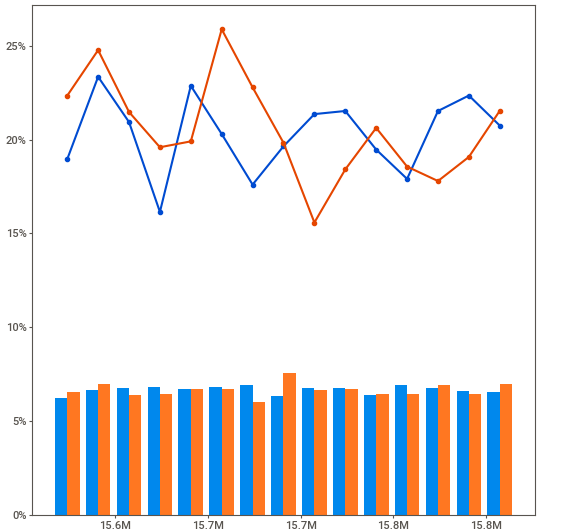
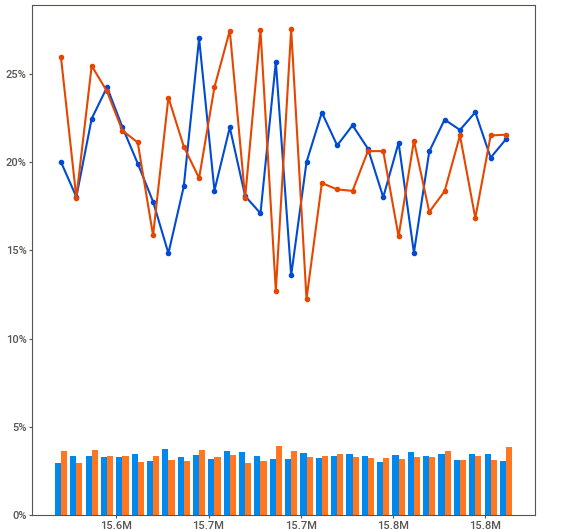
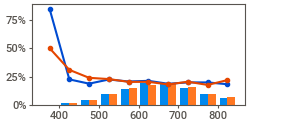
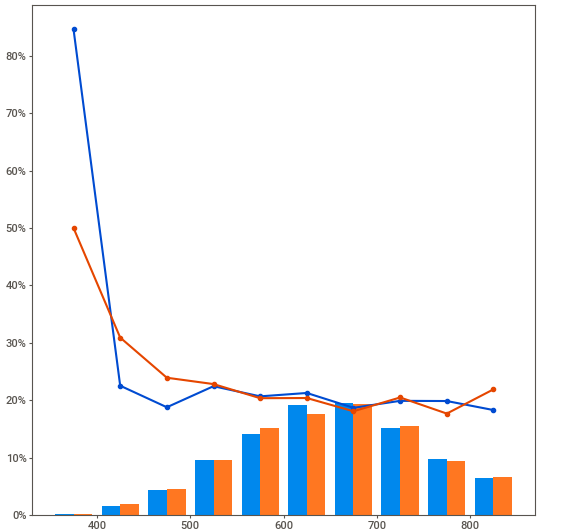
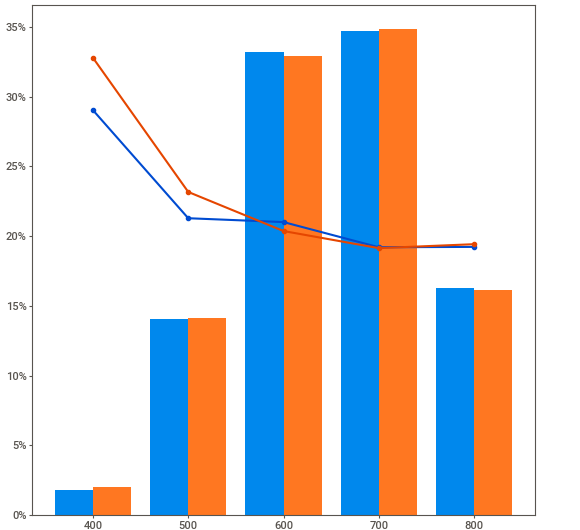
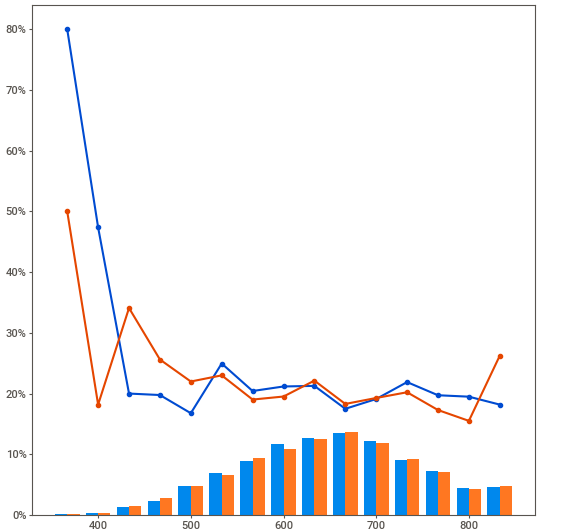
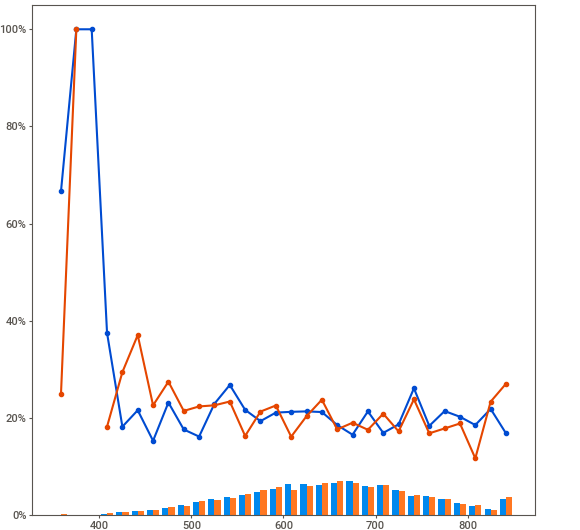
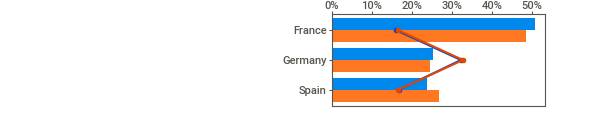
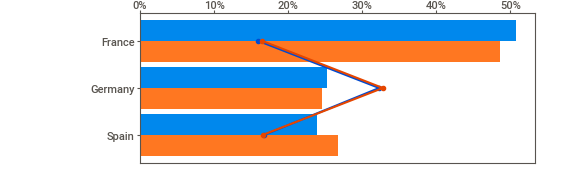
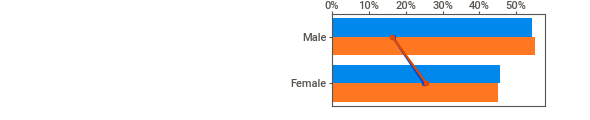
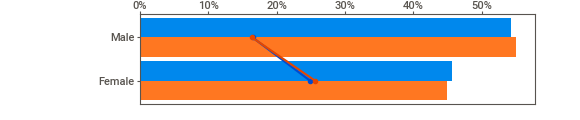
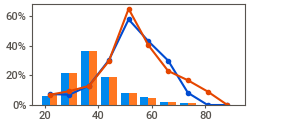
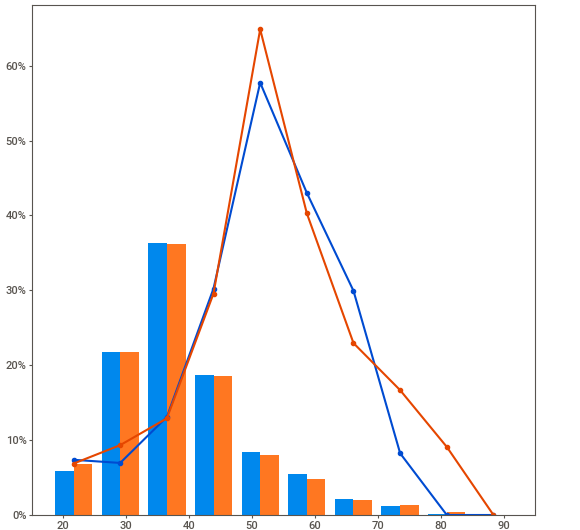
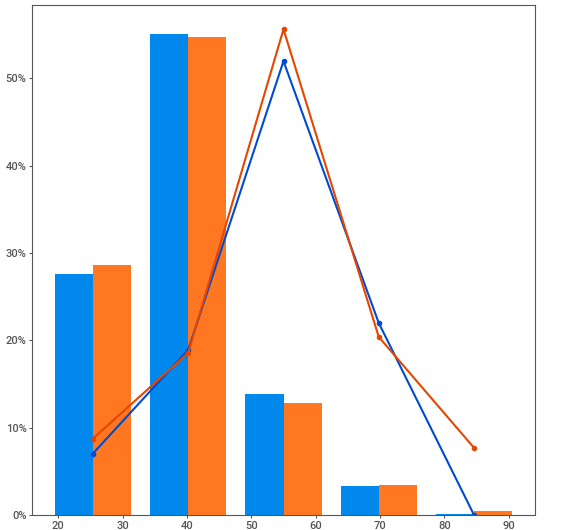
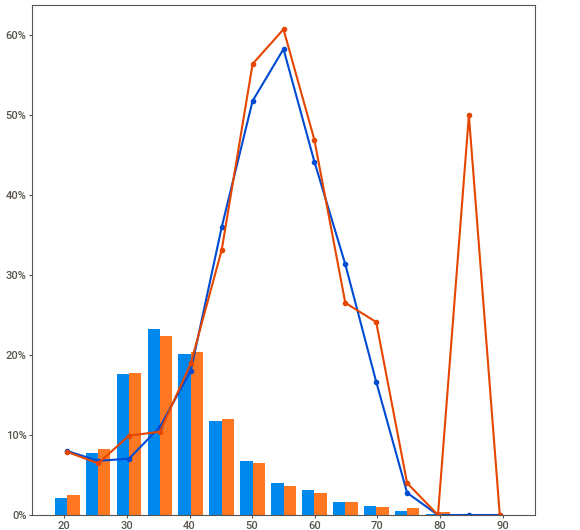
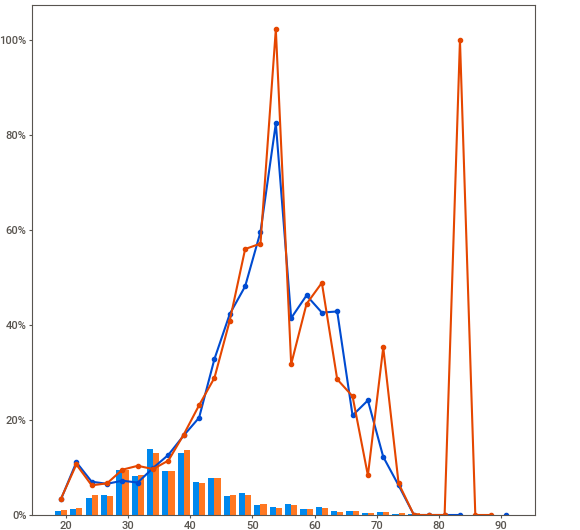
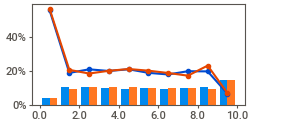
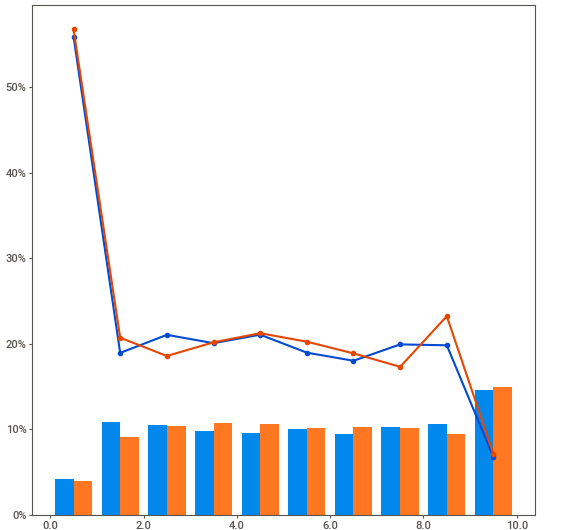
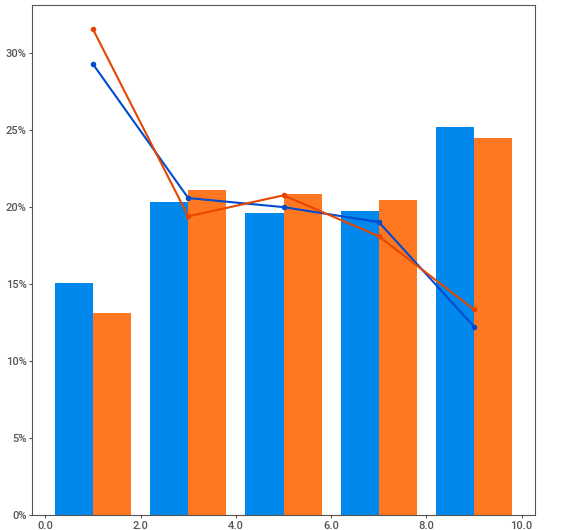
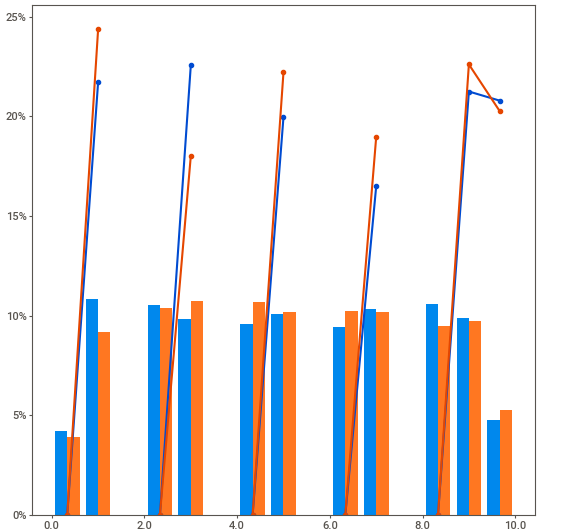
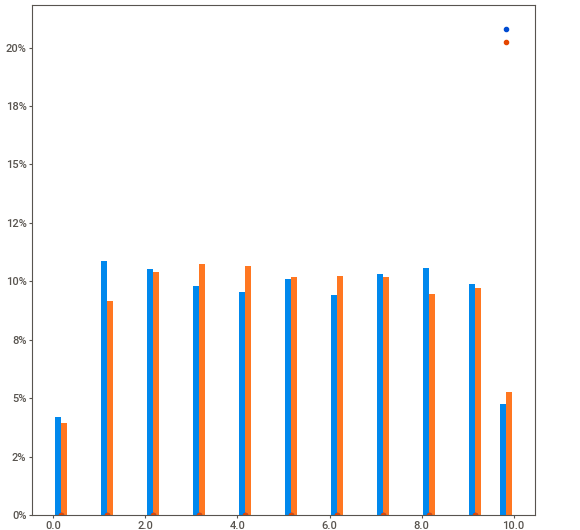
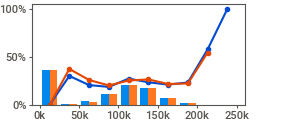
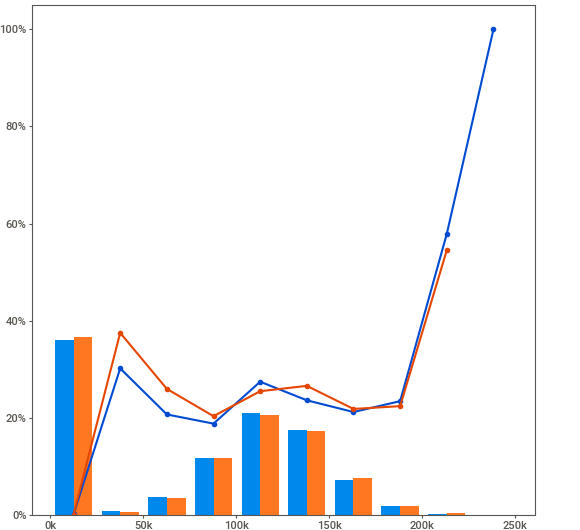
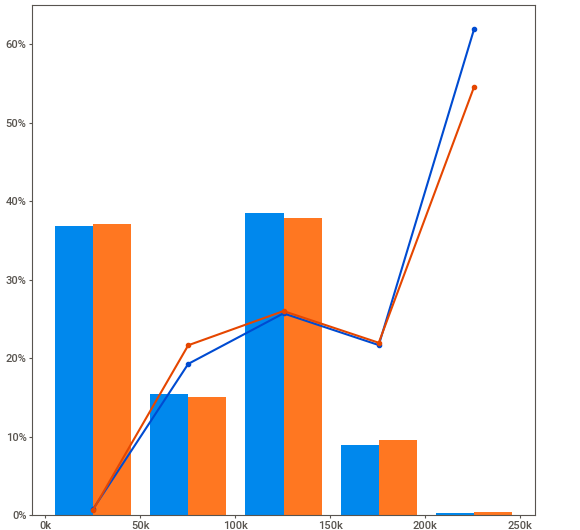
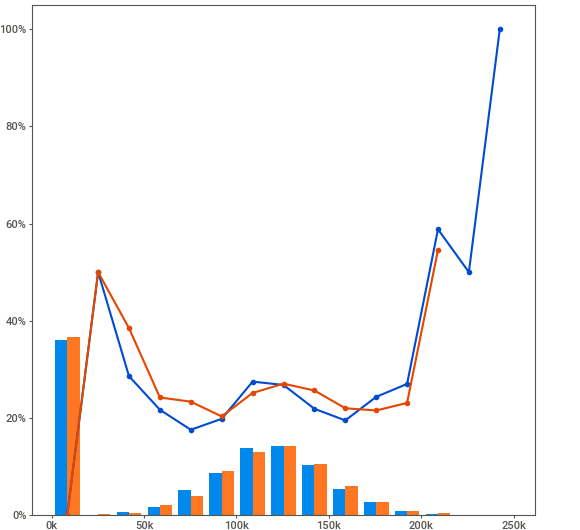
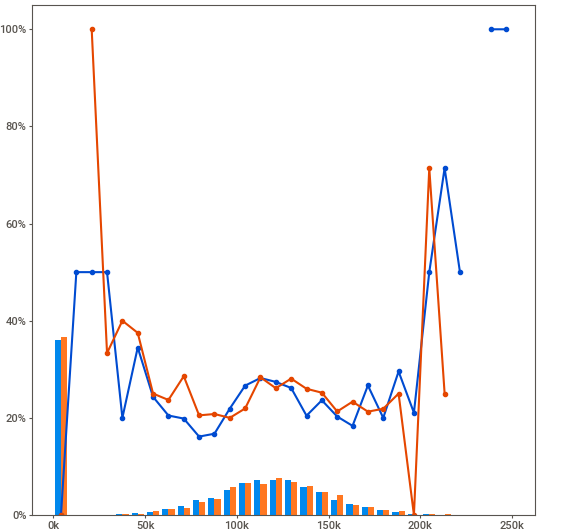
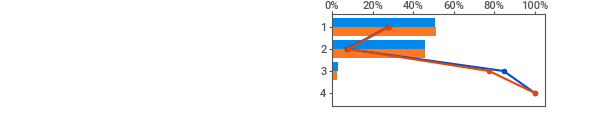
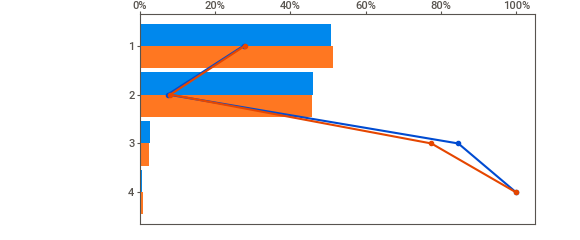
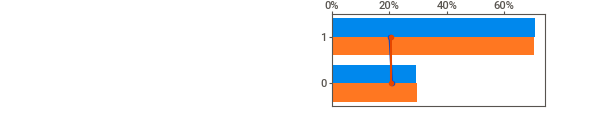
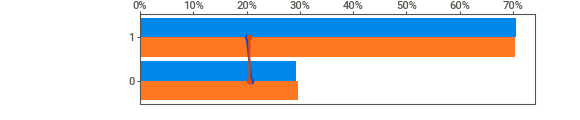
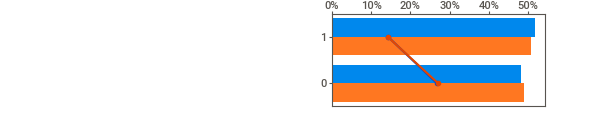
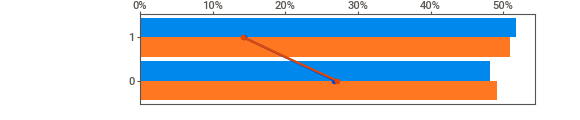
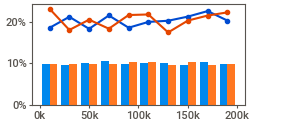
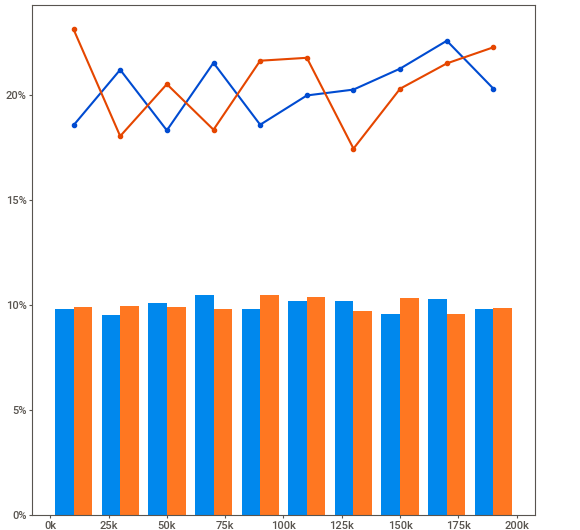
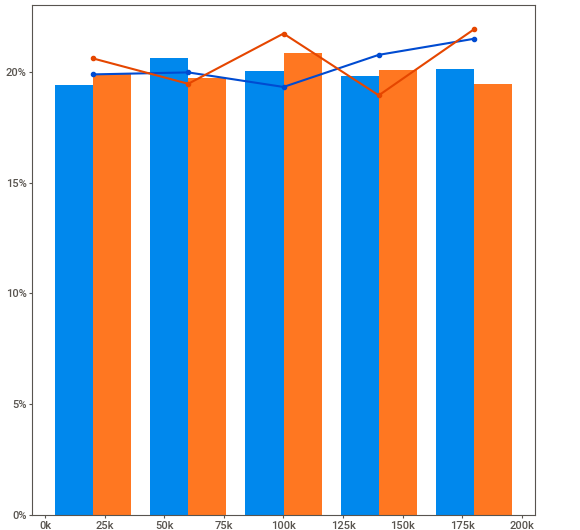
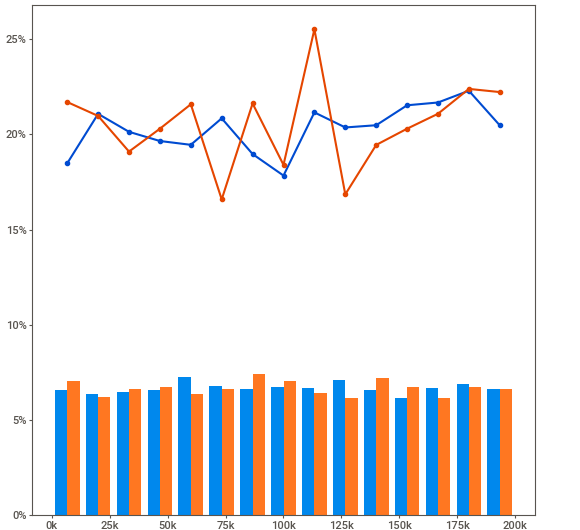
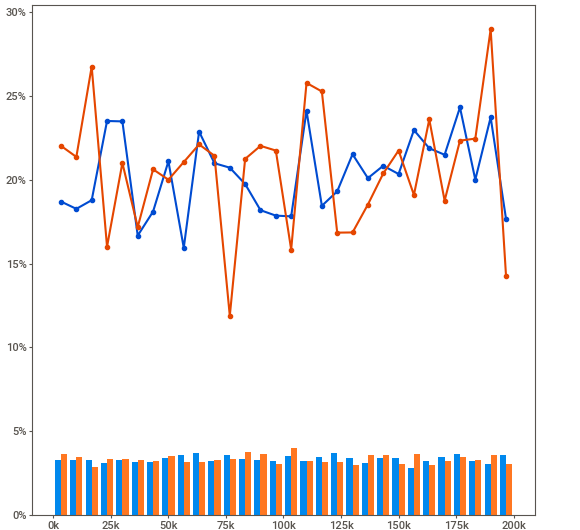
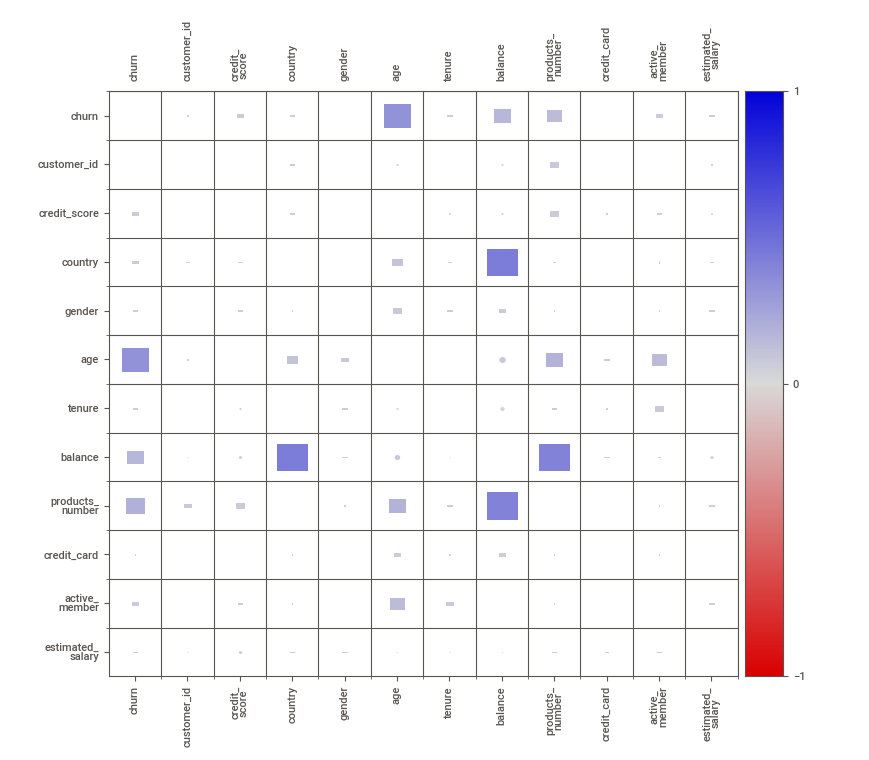
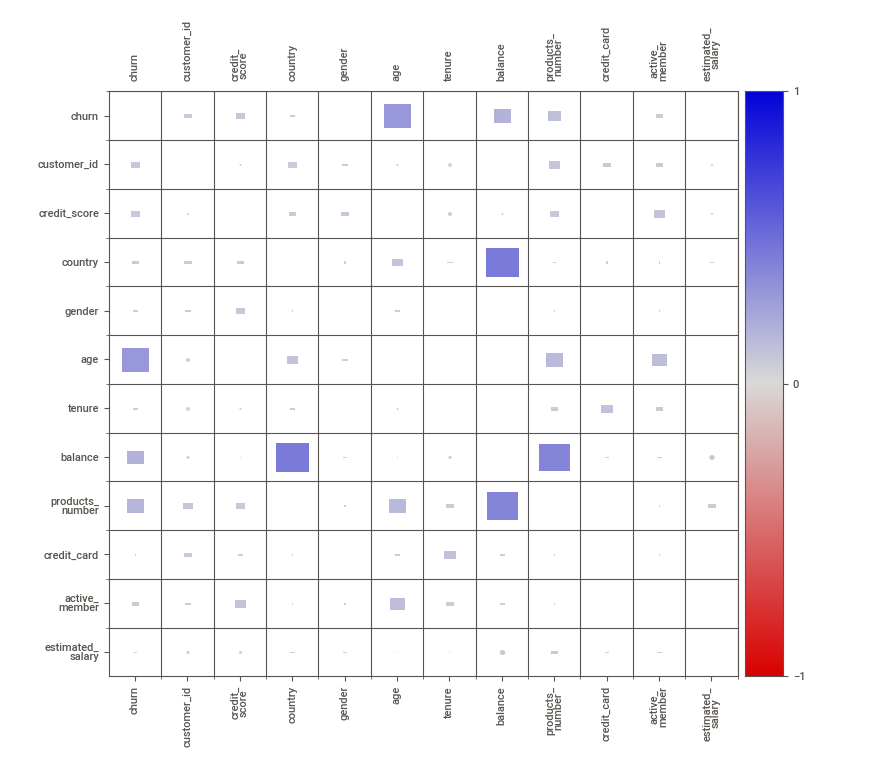

In [7]:
comparison_report.show_notebook()

*Temos duas variáveis categóricas que teremos que transformar com encoding.*

In [8]:
category_cols = ['country', 'gender']

*Criando duas listas e um ciclo for para encoding.*

In [9]:
one_hot_cols = []
binary_cols = []

In [10]:
for col in category_cols:
  if df[col].nunique() > 2:
    one_hot_cols.append(col)
  else:
    binary_cols.append(col)

In [11]:
binary_cols
one_hot_cols

['country']

*Iremos remover a coluna customer_id.*

In [12]:
df.drop(columns = ['customer_id'], inplace = True)

*Encoding das duas colunas.*

In [13]:
# one hot encoder 
df = ce.OneHotEncoder(cols = one_hot_cols).fit_transform(df)

# ordinal encoder
df = ce.OrdinalEncoder(cols = binary_cols).fit_transform(df)

In [14]:
# conferindo
df.head()

,credit_score,country_1,country_2,country_3,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,1,0,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,0,1,0,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,0,1,0,1,43,2,125510.82,1,1,1,79084.10,0


### *Treinando Modelo*

In [15]:
# removendo todos os valores nulos
df.dropna(inplace = True)

In [16]:
# retirando o target
y = df.pop('churn')
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### *Árvore de Decisão*

*Com max_depth = 6*

In [17]:
model = DecisionTreeClassifier(max_depth = 6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
score

0.8546666666666667

*Com max_depth = 12*

In [18]:
model = DecisionTreeClassifier(max_depth = 12)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
score

0.814

*Com max_depth = 18*

In [19]:
model = DecisionTreeClassifier(max_depth = 18)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
score

0.7933333333333333

*Com max_depth = 24*

In [20]:
model = DecisionTreeClassifier(max_depth = 24)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
score

0.7846666666666666

*Com max_depth = 48*

In [21]:
model = DecisionTreeClassifier(max_depth = 48)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
score

0.7853333333333333

*Podemos notar que a acurácia não aumenta quando aumentamos o max_depth.*